In [ ]:
pip install vaderSentiment

In [5]:
# Import all the python package
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive

In [6]:
# Convert star rating to sentiments
def startosentiment(_star):
    if _star >= 4:
        return 'pos'
    elif _star <= 2:
        return 'neg'
    else:
        return 'neu'

# Use Vader to analyse the sentences and convert the compound score to sentiments
def get_score(analyser, _text):
    vpolarity = analyser.polarity_scores(_text)
    # return vpolarity['compound']
    if vpolarity['compound'] > 0.05:
        return 'pos'
    elif vpolarity['compound'] < -0.05:
        return 'neg'
    else:
        return 'neu'

In [ ]:
# Initilize the Vader Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Connect to Google drive
drive.mount('/content/drive')

In [8]:
# Load the dataset into pandas dataframe
icreviews = pd.read_csv('drive/MyDrive/Colab Notebooks/reviews.csv')

In [9]:
# Data cleaning - fill 'title' column with blank if it is N/A
icreviews['title'] = icreviews['title'].fillna('')

# Combine title and text to a new column
icreviews['com_titletext'] = icreviews['title'] + " " + icreviews['text']

# Convert start rating to sentiments
icreviews['b_star'] = icreviews.apply(lambda x: startosentiment(x['stars']),axis=1)  

# Perform prediction on newly combined column 'title'+'text' and store the sentiments into new column
icreviews['com_score'] = icreviews.apply(lambda x: get_score(sia, x['com_titletext']),axis=1)

# Compute the confusion matrix
conf1 = metrics.confusion_matrix(icreviews['b_star'], icreviews['com_score'])

# Print the precision and recall, among other metrics
print(metrics.classification_report(icreviews['b_star'], icreviews['com_score'], digits=3))

              precision    recall  f1-score   support

         neg      0.700     0.493     0.579      1135
         neu      0.110     0.025     0.040       407
         pos      0.875     0.965     0.918      6401

    accuracy                          0.849      7943
   macro avg      0.562     0.494     0.512      7943
weighted avg      0.811     0.849     0.824      7943



Text(0.5, 1.0, "Ben & Jerry's")

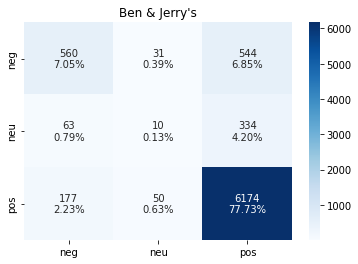

In [10]:
# Plot the confusion matrix
group_counts = ["{0:0.0f}".format(value) for value in conf1.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in conf1.flatten()/np.sum(conf1)]
labels = [f"{v2}\n{v3}" for v2, v3 in zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(3,3)
x_axis_labels = ['neg','neu','pos'] # labels for x-axis
y_axis_labels = ['neg','neu','pos'] # labels for y-axis
sns.heatmap(conf1, xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=labels, fmt='', cmap="Blues").set_title("Ben & Jerry's")

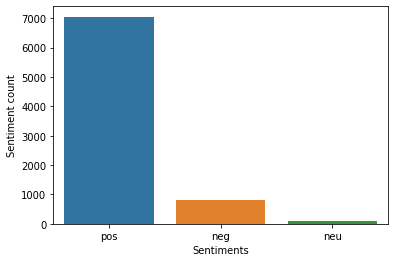

In [11]:
# Overview of predicted sentiments by Vader
ax = sns.countplot(x ='com_score', data = icreviews)
ax.set(ylabel='Sentiment count', xlabel='Sentiments')
plt.show()

Text(0.5, 1.0, 'Sentiment distribution pie chart')

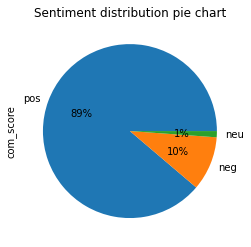

In [12]:
# Sentiment distribution pie plot
icreviews['com_score'].value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Sentiment distribution pie chart")

[Text(0, 0.5, 'Sentiment count'), Text(0.5, 0, 'Ice cream brand')]

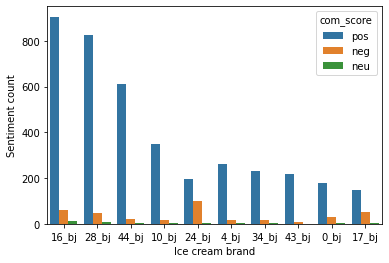

In [13]:
# Top 10 ice cream brand sort by number of reviews
df_prod_reviewcount = icreviews['key'].value_counts().head(10).reset_index()
df_prod_isin = icreviews.loc[icreviews['key'].isin(df_prod_reviewcount['index'])]
ax1 = sns.countplot(x ='key', hue='com_score', data = df_prod_isin, order = df_prod_isin['key'].value_counts().index)
ax1.set(ylabel='Sentiment count', xlabel='Ice cream brand')

[Text(0, 0.5, 'Sentiment count'), Text(0.5, 0, 'Ice cream brand')]

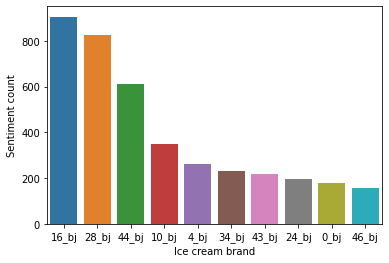

In [14]:
# Top 10 ice cream brand sort by positive review
df_posreview = icreviews.loc[icreviews['com_score'] == 'pos']
df_prod_positivecount = df_posreview['key'].value_counts().head(10).reset_index()
ax2 = sns.barplot(x ='index', y= 'key', data = df_prod_positivecount)
ax2.set(ylabel='Sentiment count', xlabel='Ice cream brand')

[Text(0, 0.5, 'Sentiment count'), Text(0.5, 0, 'Ice cream brand')]

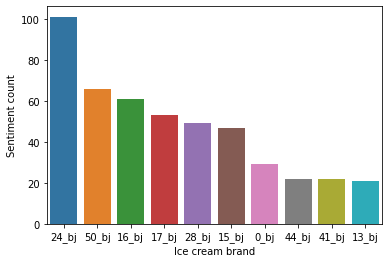

In [15]:
# Top 10 ice cream brand sort by negative review
dfnegreview = icreviews.loc[icreviews['com_score'] == 'neg']
df_prod_negcount = dfnegreview['key'].value_counts().head(10).reset_index()
ax2 = sns.barplot(x ='index', y= 'key', data = df_prod_negcount)
ax2.set(ylabel='Sentiment count', xlabel='Ice cream brand')

[Text(0, 0.5, 'Sentiment count'), Text(0.5, 0, 'Ice cream brand')]

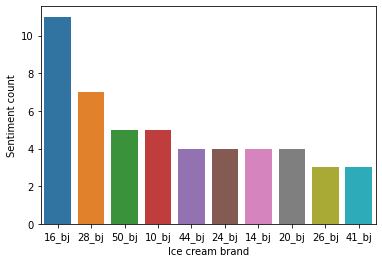

In [16]:
# Top 10 ice cream brand sort by neutral review
dfneureview = icreviews.loc[icreviews['com_score'] == 'neu']
df_prod_neucount = dfneureview['key'].value_counts().head(10).reset_index()
ax2 = sns.barplot(x ='index', y= 'key', data = df_prod_neucount)
ax2.set(ylabel='Sentiment count', xlabel='Ice cream brand')

[Text(0, 0.5, 'Sentiment count'), Text(0.5, 0, 'Ice cream brand')]

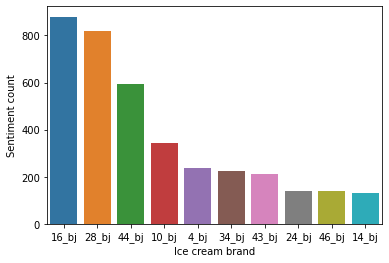

In [17]:
# Top 10 ice cream brand sort by 4 or 5 stars rating
df_posreview = icreviews.loc[icreviews['b_star'] == 'pos']
df_prod_positivecount = df_posreview['key'].value_counts().head(10).reset_index()
ax2 = sns.barplot(x ='index', y= 'key', data = df_prod_positivecount)
ax2.set(ylabel='Sentiment count', xlabel='Ice cream brand')

[Text(0, 0.5, 'Sentiment count'), Text(0.5, 0, 'Ice cream brand')]

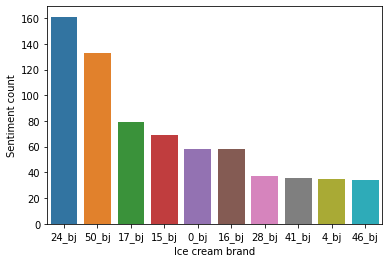

In [18]:
# Top 10 ice cream brand sort by 1 or 2 stars rating
dfnegreview = icreviews.loc[icreviews['b_star'] == 'neg']
df_prod_negcount = dfnegreview['key'].value_counts().head(10).reset_index()
ax2 = sns.barplot(x ='index', y= 'key', data = df_prod_negcount)
ax2.set(ylabel='Sentiment count', xlabel='Ice cream brand')

[Text(0, 0.5, 'Sentiment count'), Text(0.5, 0, 'Ice cream brand')]

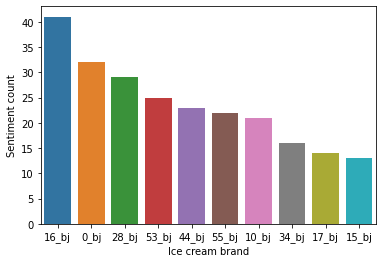

In [19]:
# Top 10 ice cream brand sort by 3 stars rating
dfneureview = icreviews.loc[icreviews['b_star'] == 'neu']
df_prod_neucount = dfneureview['key'].value_counts().head(10).reset_index()
ax2 = sns.barplot(x ='index', y= 'key', data = df_prod_neucount)
ax2.set(ylabel='Sentiment count', xlabel='Ice cream brand')